<a href="https://colab.research.google.com/github/JyothiNandhan/FMML_Labs_Projects/blob/main/Submission_of_AIML_Probabilistic_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Probabilistic ML models

Topics:
1. Convolutional Operation
2. CNN and Using Learnt Representations
3. CNN Visualization

## 1. Convolutional Operations

Central to Convolutional Neural Networks (CNN), a convolution operation is a linear operation which involves element-wise multiplication between a small filter (say, a matrix of integers) and filter-sized patch from the image. We move this filter across the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image $f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>


Image reference: [Streaming Architecture for Large-Scale Quantized Neural Networks on an FPGA-Based Dataflow Platform](https://www.researchgate.net/publication/318849314_Streaming_Architecture_for_Large-Scale_Quantized_Neural_Networks_on_an_FPGA-Based_Dataflow_Platform/figures?lo=1)

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

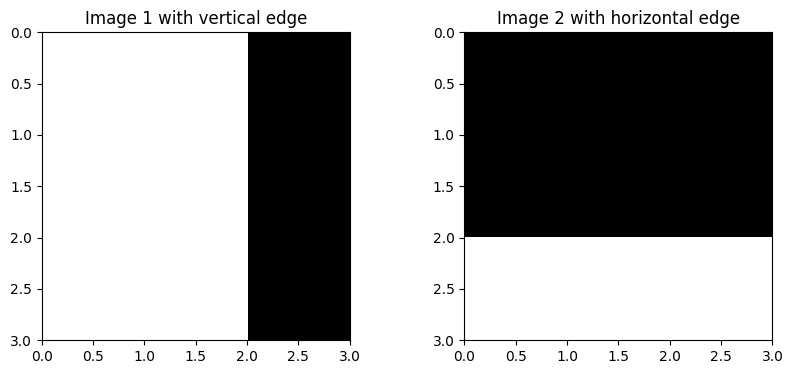

In [3]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0],
                   [1,1,0],
                   [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0],
                   [0,0,0],
                   [1,1,1]])

# print(image1*255)
# Let's plot the images
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
# plt.ylim(0, 3)
ax.set_title('Image 1 with vertical edge')

ax = fig.add_subplot(1,2,2)
ax.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
ax.set_title('Image 2 with horizontal edge')
plt.show()

Let's create a 3x3 vertical edge filter. We will 'convolve' this filter over the images to detect vertical edge. As the image is same size as of filter, this is simple element-wise multiplication and summing up the result into single value.

In [4]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

In [5]:
# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image.
Now, let's create a horizontal edge filter and apply it to both the above images.

In [6]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


As expected, the horizontal edge is detected in second image with this filter.

Now, we will take a bigger image (5 x 5) and see how a convolution operation works by sliding a filter left to right and top to bottom to obtain an output map from image. Let's define a function ***apply_filter()*** for this.

In [7]:
def apply_filter(img, filter):
  height, width = img.shape
  filter_size = filter.shape

  output = np.empty(0)

  # Move the filter over entire image and store the result in output
  for i in range(0, height - filter_size[1] + 1):
    for j in range(0, width - filter_size[0] + 1):
      # Matrix multiplication for a single patch of image and filter
      output = np.append(output, np.sum(np.multiply(img[i:i+filter_size[0], j:j+filter_size[1]], filter)))

  # Calculate the output shape of the resultant image
  output_shape = (height - (filter_size[1]-1)), (width - (filter_size[0]-1))

  # Return the reshaped image
  return output.reshape(output_shape)

Plotting function

In [8]:
def plot_images(images, titles, tick_params=True):
  n = len(images)
  fig = plt.figure(figsize=(10,4))
  for i in range(n):
    ax = fig.add_subplot(1,n,i+1)
    if len(images[i].shape) == 2:
      ax.imshow(images[i], cmap='gray',
                extent=(0,images[i].shape[1], images[i].shape[0], 0))
    else:
      ax.imshow(images[i])
    ax.set_title(titles[i])
    if not tick_params:
      plt.tick_params(axis='both', labelbottom=False, bottom=False,
                labelleft=False, left=False)
  plt.show()

In [9]:
# 2D image
img = np.array([[20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0]])

# Vertical edge filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])


output = apply_filter(img, filter)
print(output) # Note the shape of output image!

[[60. 60.  0.]
 [60. 60.  0.]
 [60. 60.  0.]]


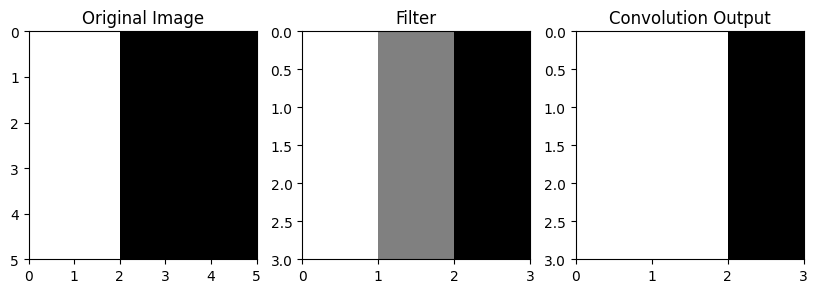

In [10]:
# Let's plot the above image with results
images = []
titles = []

images.append(img)
titles.append('Original Image')

images.append(filter)
titles.append('Filter')

images.append(output)
titles.append('Convolution Output')

plot_images(images, titles)

As, you can see, horizontal edge is detected in the output.

Now, we will see the effect of applying this filter on a grayscale image. Again, for this, we need to 'convolve' the filter over the entire image.
We will use the same filter and function defined earlier.

In [11]:
# Get the sample image
!curl -L -o 'lotus.jpg' 'https://drive.google.com/uc?export=download&id=1gQSQlrUws22KLRUacXwvN1G8FtIyhfGt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2815  100  2815    0     0   3778      0 --:--:-- --:--:-- --:--:-- 2749k


Original image size:  (99, 100)
Output image size:  (97, 98)


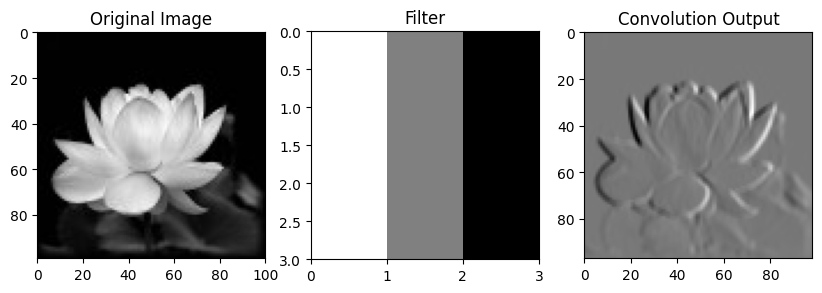

In [12]:
# Read the image with opencv, 0 stands for 'grayscale'
image = cv2.imread('lotus.jpg', 0)
print('Original image size: ', image.shape)

# Saving images for plots
images = []
titles = []

images.append(image)
titles.append('Original Image')

# Vertical edge filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

images.append(filter)
titles.append('Filter')

# Apply this filter to image
output = apply_filter(image, filter)

print('Output image size: ', output.shape)

images.append(output)
titles.append('Convolution Output')

# Let's plot the images
plot_images(images, titles)

### Exercise
1. Try padding in convolution on lotus.jpg and show results
2. Try stride  in convolution on lotus.jpg and show results

**1)Try padding in convolution on lotus.jpg and show results**

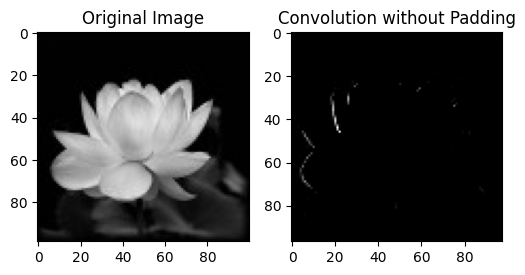

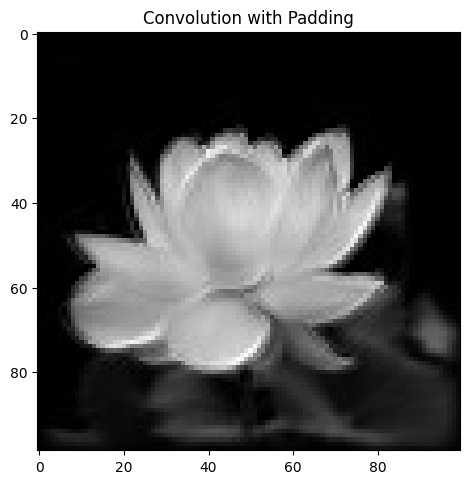

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the image
image_path = "lotus.jpg"  # Replace with the actual path to your image
image = tf.keras.preprocessing.image.load_img(image_path)
image_array = tf.keras.preprocessing.image.img_to_array(image)

# Add batch dimension and normalize the image
input_image = tf.expand_dims(image_array, axis=0) / 255.0

# Display the original image
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

# Apply convolution without padding
conv_without_padding = tf.keras.layers.Conv2D(1, (3, 3), activation='relu')(input_image)
plt.subplot(1, 2, 2)
plt.imshow(conv_without_padding[0, :, :, 0], cmap='gray')
plt.title("Convolution without Padding")

# Apply convolution with padding
conv_with_padding = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='relu')(input_image)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(conv_with_padding[0, :, :, 0], cmap='gray')
plt.title("Convolution with Padding")

plt.show()

**2)Try stride in convolution on lotus.jpg and show results**

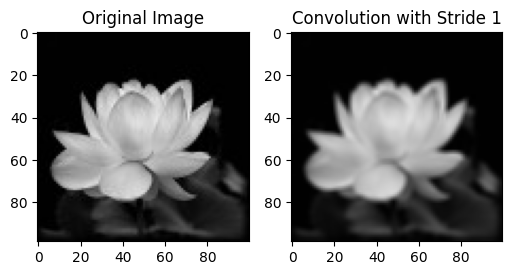

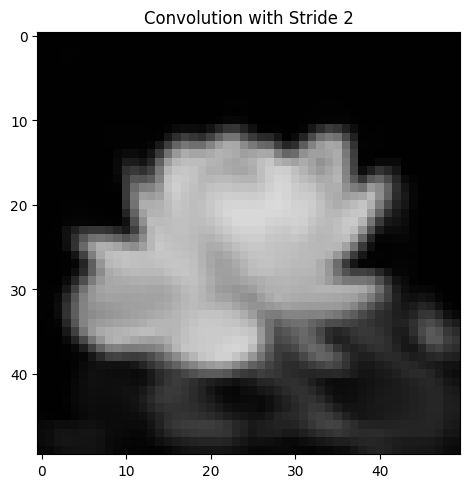

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "lotus.jpg"  # Replace with the actual path to your image

# Check if the image file exists
try:
    image = cv2.imread(image_path)

    if image is None:
        raise FileNotFoundError(f"Error: Unable to load the image from the path '{image_path}'.")

except Exception as e:
    print(f"Error: {e}")
    exit()

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, 0)

# Display the original image
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, 0))
plt.title("Original Image")

# Apply convolution with stride 1
kernel = np.ones((3, 3), np.float32) / 9
conv_stride_1 = cv2.filter2D(gray_image, -1, kernel)
plt.subplot(1, 2, 2)
plt.imshow(conv_stride_1, cmap='gray')
plt.title("Convolution with Stride 1")

# Apply convolution with stride 2 manually
stride = 2
conv_stride_2 = cv2.filter2D(gray_image[::stride, ::stride], -1, kernel)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(conv_stride_2, cmap='gray')
plt.title("Convolution with Stride 2")

plt.show()




## 2. CNN and Using Learnt Representations

Now lets implement a CNN in pytorch and use the learnt representations for image classification of MNIST dataset.

<img src='https://miro.medium.com/max/1872/1*SGPGG7oeSvVlV5sOSQ2iZw.png' />

Image reference: https://miro.medium.com/max/1872/1*SGPGG7oeSvVlV5sOSQ2iZw.png

We will be implementing a CNN model which can predict the digit, given a grayscale image. The architecture of model is given in the above image.

**We will do the following steps in order:**
1.   Load and visualize MNIST training and test datasets using torchvision
2.   Define the CNN model
3.   Define a loss function and optimizer
4.   Train the network on the training data
5.   Evaluate the network on the test data

In [14]:
# Import packages
import torch
import torchvision
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np


In [15]:
# Device configuration (whether to run on GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [16]:
# Set seeds for reproducibility
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

#### Load MNIST data
We will use the [MNIST dataset](https://pytorch.org/vision/stable/datasets.html#mnist) from torchvision Pytorch and setup the train and test dataloaders.

In [17]:
batch_size_train = 128
batch_size_test = 128

# Images in torchvision datasets are PIL Images in range [0,1] so we need
# 'ToTensor' transform to convert them into tensors
train_data = torchvision.datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size_test, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 110200308.65it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 39781837.05it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30412489.71it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20865858.45it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



#### Understand the dataset
Let us now visualize the dataset in terms of number of samples, classes etc.

In [18]:
print('Training data shape : ', train_data.data.shape, train_data.targets.shape)
print('Testing data shape : ', test_data.data.shape, test_data.targets.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_data.targets.numpy())
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  torch.Size([60000, 28, 28]) torch.Size([60000])
Testing data shape :  torch.Size([10000, 28, 28]) torch.Size([10000])
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [19]:
# Helper function to plot data
def plot_data(images, labels, classes=None):
  figure = plt.figure(figsize=(9, 4))
  cols, rows = 5, 2
  for i in range(1, cols * rows + 1):
      sample_idx = torch.randint(len(images), size=(1,)).item()
      img, label = images[sample_idx], labels[sample_idx]
      figure.add_subplot(rows, cols, i)
      if classes is not None:
        label = classes[label]
      plt.title('Label:' +str(label))
      plt.axis("off")
      plt.imshow(img.squeeze(), cmap="gray")
  plt.show()

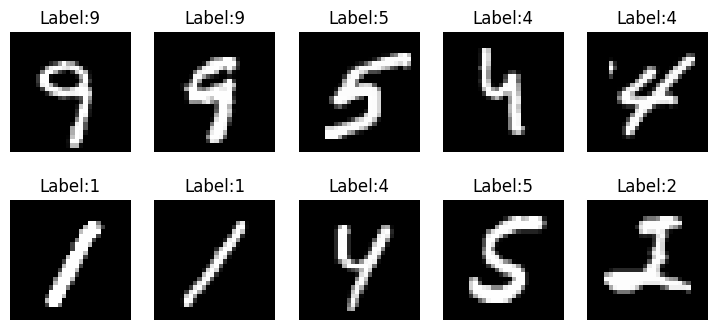

In [20]:
plot_data(train_data.data, train_data.targets.numpy())

#### Define the model

In [21]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # fully connected layer
        self.fc = nn.Linear(64 * 7 * 7, 128)
        # output layer 10 classes
        self.out = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x) #activation
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.max_pool2(x)
        # flatten the output for FC layer
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        output = self.out(x)
        return output

In [22]:
# Build the model object and put on the device
model = CNN().to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3136, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=10, bias=True)
)


#### Define Loss function

In [23]:
# Cross Entropy loss for multi-class classification
loss_func = nn.CrossEntropyLoss()

#### Define optimizer

In [24]:
# Basic SGD optimizer with 0.01 learning rate
optimizer = optim.SGD(model.parameters(), lr = 0.01)

#### Train the model

Helper function for training/testing

In [25]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Put data on devices
      images = images.to(device)
      labels = labels.to(device)

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [26]:
def test(model, test_loader):
  # Eval mode
  model.eval()
  test_acc = 0
  correct = 0
  for i, (images, labels) in enumerate(test_loader):
    # Deactivate autograd engine (don't compute grads since we're not training)
    with torch.no_grad():
      images, labels = images.to(device), labels.to(device)
      output = model(images)

      # Calculate number of correct predictions
      _, preds = torch.max(output, dim=1)
      correct += (preds == labels).sum()

  test_acc = correct / len(test_loader.dataset)
  print('Test Accuracy: {:.4f}'.format(test_acc*100))

  # Plot the images with predicted labels
  plot_data(images.data.cpu().numpy(), preds.data.cpu().numpy(), test_loader.dataset.classes)

Start training

In [27]:
num_epochs = 10  # iterations
train_losses, train_acc = train(num_epochs, model, train_loader, loss_func, optimizer)

Epoch 1/10, Loss: 0.0115, Accuracy: 63.7583
Epoch 2/10, Loss: 0.0029, Accuracy: 89.0600
Epoch 3/10, Loss: 0.0022, Accuracy: 91.6233
Epoch 4/10, Loss: 0.0018, Accuracy: 93.1517
Epoch 5/10, Loss: 0.0015, Accuracy: 94.3717
Epoch 6/10, Loss: 0.0013, Accuracy: 95.3050
Epoch 7/10, Loss: 0.0011, Accuracy: 95.8450
Epoch 8/10, Loss: 0.0010, Accuracy: 96.3667
Epoch 9/10, Loss: 0.0009, Accuracy: 96.6967
Epoch 10/10, Loss: 0.0008, Accuracy: 97.0167


Plot training plots

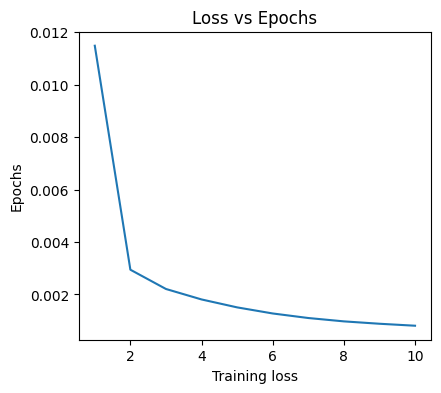

In [28]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
plt.show()

#### Evaluate the model

Test Accuracy: 97.2600


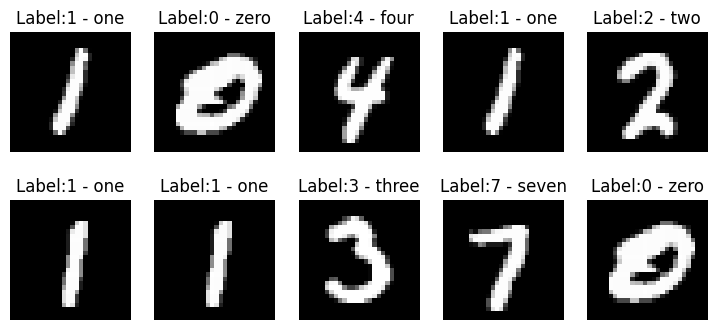

In [29]:
# Evaluate the model on testing data and plot predictions
test(model, test_loader)

### Exercises

Q 1: What is the ratio of parameters in single 5 x 5 kernel and equivalent stacked 3 x 3 kernels? Consider number of channels in input and output channels as C.

**Answer:** the number of parameters in a single 5x5 kernel and equivalent stacked 3x3 kernels. Assuming the input has C input channels and the output has C output channels, we can calculate the number of parameters in each case.

Single 5x5 Kernel:
For each output channel, we have a 5x5 kernel. So, for C output channels, the total number of parameters is C×5×5.

Equivalent Stacked 3x3 Kernels:
For each output channel, we have two 3x3 kernels. So, for C output channels, the total number of parameters is

2×C×3×3.

Now, let's calculate the ratio:

Ratio = Parameters in 5x5 kernel / Parameters in stacked 3x3 kernels

Ratio= C×5×5 / 2×C×3×3

Simplifying the expression as:

Ratio = 25 / 18​

So, the ratio of parameters in a single 5x5 kernel to equivalent stacked 3x3 kernels is 25/18

when considering the number of input and output channels as C. Stacking multiple 3x3 kernels allows for a more efficient use of parameters compared to a single 5x5 kernel, which is often a motivation for using smaller kernels in convolutional neural networks.

The benefit of using equivalent stacked 3x3 kernels over a single 5x5 kernel lies in several aspects:

Computational Efficiency:

Stacking two 3x3 kernels requires fewer parameters compared to a single 5x5 kernel, as shown by the parameter ratio (25 / 18). Fewer parameters result in reduced computational requirements during both training and inference, which can be crucial in resource-constrained environments.

Non-Linearity:

Stacking multiple 3x3 kernels allows for the introduction of non-linearities at multiple stages, as each 3x3 kernel is followed by a non-linear activation function (e.g., ReLU). This increased depth in non-linear transformations can enhance the expressive power of the network, enabling it to learn more complex features.

Hierarchical Feature Extraction:

Stacking 3x3 kernels enables the network to learn hierarchical features. Each 3x3 convolution captures local patterns, and stacking them allows the model to learn increasingly complex and abstract features through multiple layers.

Effective Receptive Field:

Stacking multiple 3x3 kernels with non-linearities can achieve an effective receptive field comparable to that of a larger kernel (e.g., 5x5 or 7x7) without increasing the number of parameters. This can help the network capture spatial dependencies over a larger area without a proportional increase in computational cost.

Regularization:

Stacking multiple smaller kernels can act as a form of regularization. The increased depth and non-linearities introduced by stacking can contribute to better generalization and improved model robustness.

Gradient Flow:

The use of smaller kernels can help in maintaining a more efficient gradient flow during backpropagation. This can facilitate the training of deeper networks.



Q 2: How can you replace 7 x 7 convolution kernel using only 3 x 3 kernels? What would be ratio of parameters in this case? Consider number of channels in input and output channels as C.

Q 2: How can you replace 7 x 7 convolution kernel using only 3 x 3 kernels? What would be ratio of parameters in this case? Consider number of channels in input and output channels as C.

To replace a 7x7 convolution kernel using only 3x3 kernels, we can use a series of stacked 3x3 kernels to mimic the receptive field of the larger 7x7 kernel. Specifically, we can use three consecutive 3x3 kernels to achieve the desired effect. Each 3x3 kernel will contribute to capturing spatial dependencies within the receptive field.

let's calculate the number of parameters for both cases and finding the ratio:

Single 7x7 Kernel:

For each output channel, we have a 7x7 kernel. So, for C output channels, the total number of parameters is C×7×7.

Equivalent Stacked 3x3 Kernels:

For each output channel, we use three 3x3 kernels. So, for C output channels, the total number of parameters is

3×C×3×3.

let's calculate the ratio:

Ratio = Parameters in 7x7 kernel / Parameters in stacked 3x3 kernels

Ratio= C×7×7 / 3×C×3×3

Simplifying the expression as:

Ratio = 49 / 7

So, the ratio of parameters in a single 7x7 kernel to equivalent stacked 3x3 kernels is 49 / 9​when considering the number of input and output channels as C. This implies that using three stacked 3x3 kernels is more parameter-efficient than a single 7x7 kernel.

## 3. CNN Visualization

Save the conv layers and their weights

In [30]:
model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the conv layers in this list
# get all the model children as list
model_children = list(model.children())

# counter to keep count of the conv layers
counter = 0
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 2


In [31]:
# take a look at the conv layers and the respective weights
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

CONV: Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([32, 1, 3, 3])
CONV: Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([64, 32, 3, 3])


### Visualize the CONV layer filters

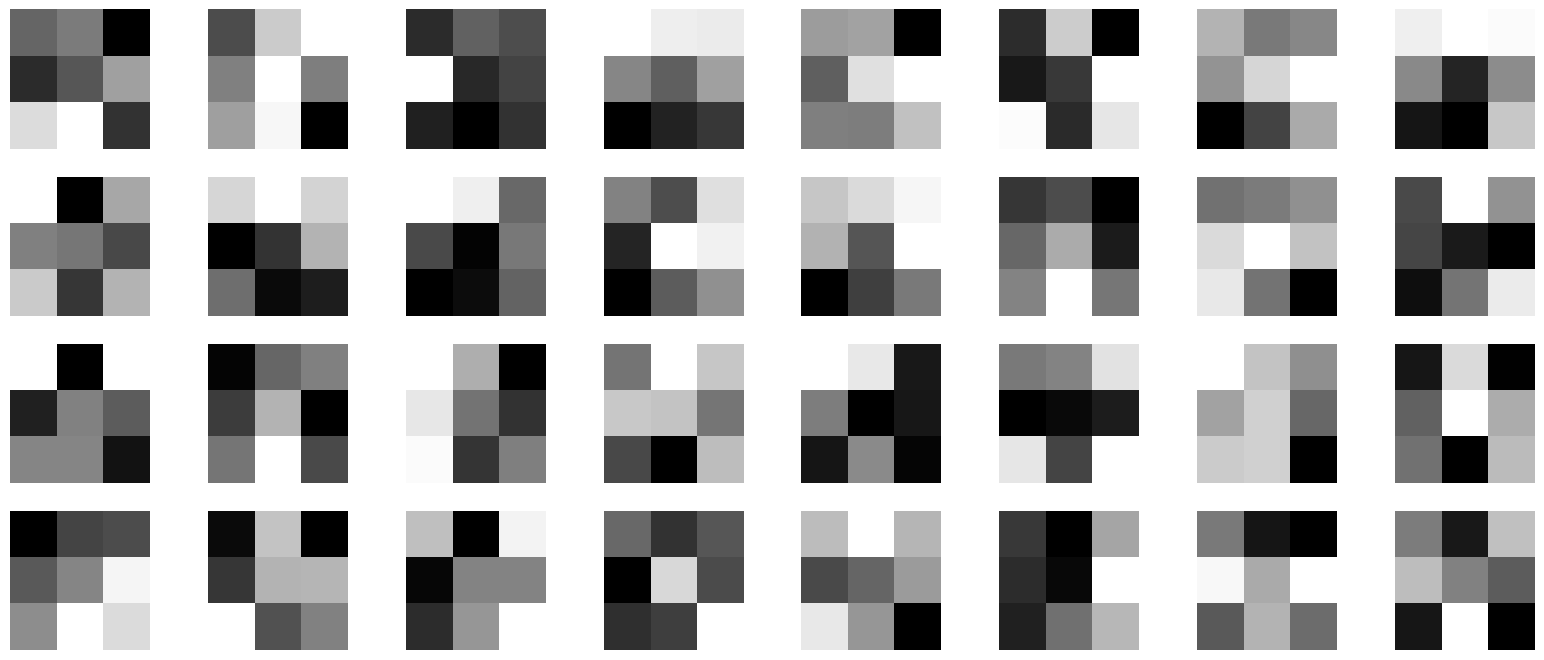

In [32]:
# Visualize the conv layer filters
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(8, 8, i+1) # (8, 8)
    plt.imshow(filter[0, :, :].data.cpu().numpy(), cmap='gray')
    plt.axis('off')
plt.show()

### Visualize filter outputs on an image
Get an image from test dataset

2
5
8
1
2
8
6
5
1
6
5
2
6
4
9
6
9
8
3
2
8
5
0
3
1


<ipython-input-33-30dde3d235a5>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(3, 3))


2
7
1
7
7
4
7
3
7
0
4
4
8
7
7
7
0
9
0
5
2
1
7
8
4
9
4
8
2
1
7
4
8
4
8
6
5
4
8
4
7
1
4
9
7
4
9
3
1
4
0
5
8
2


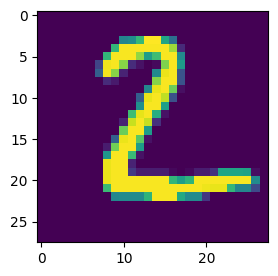

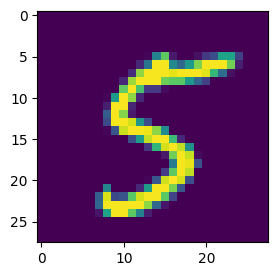

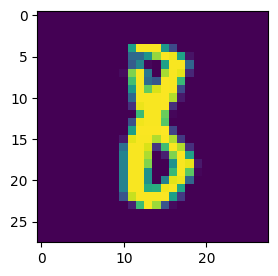

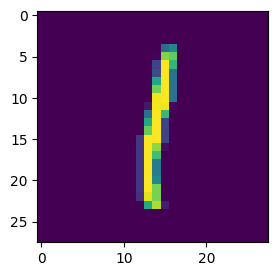

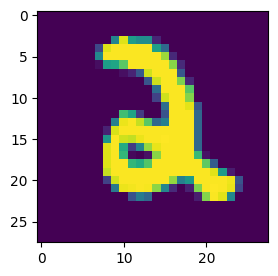

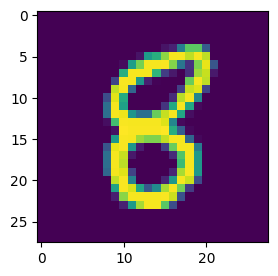

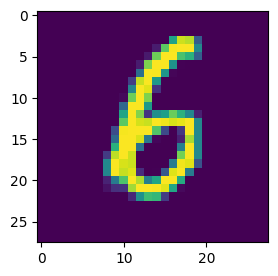

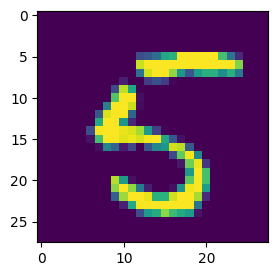

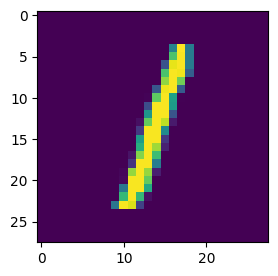

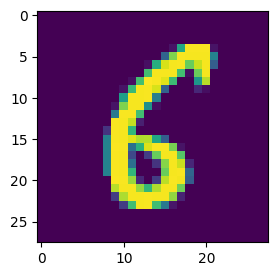

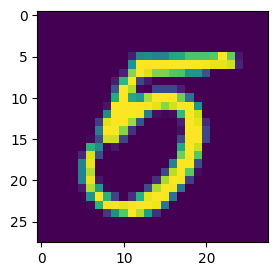

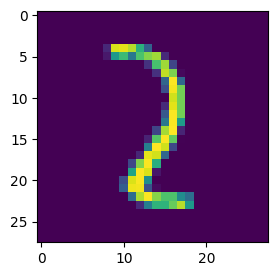

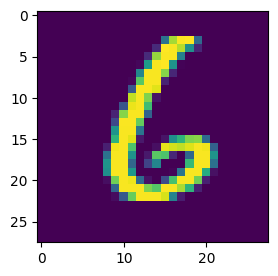

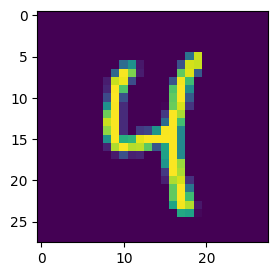

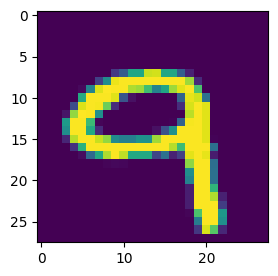

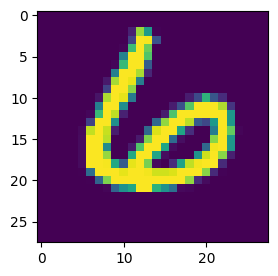

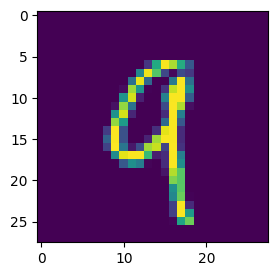

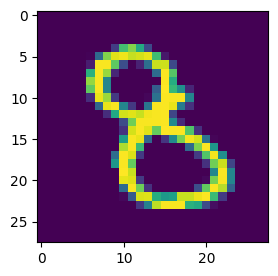

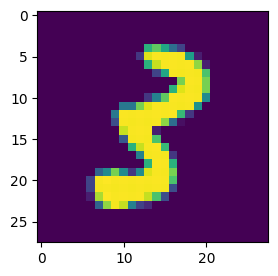

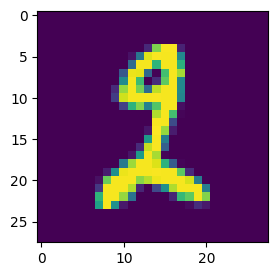

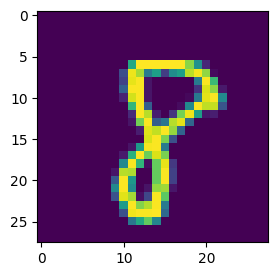

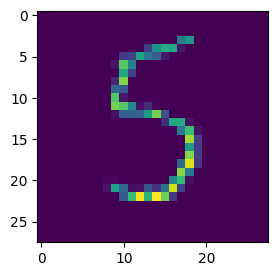

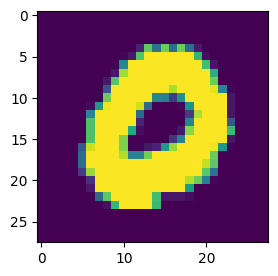

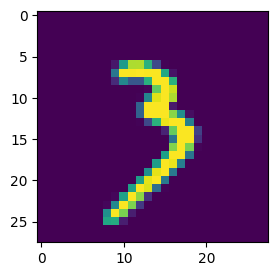

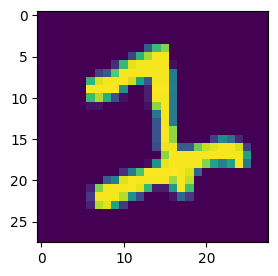

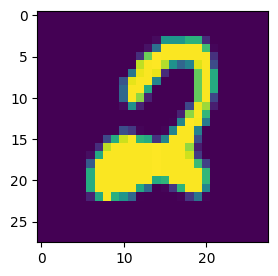

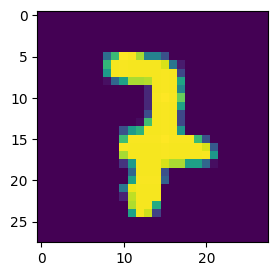

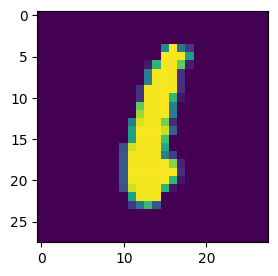

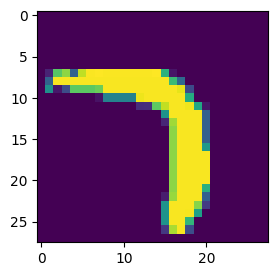

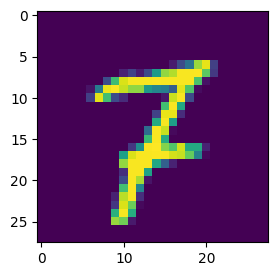

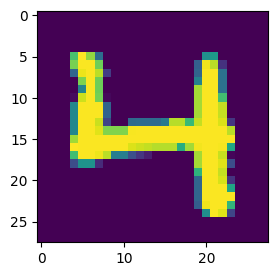

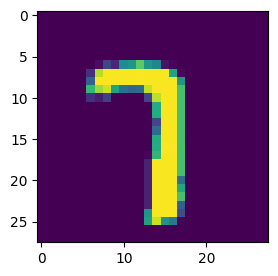

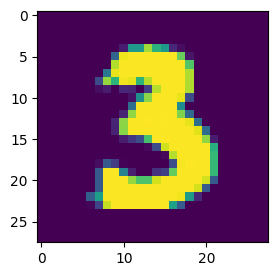

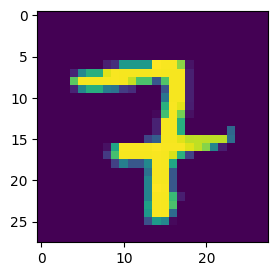

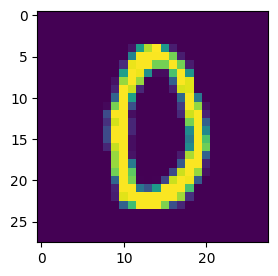

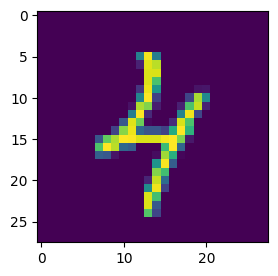

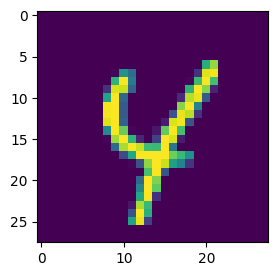

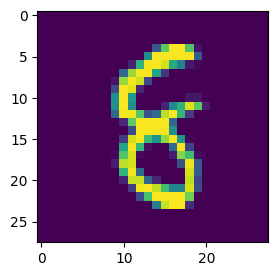

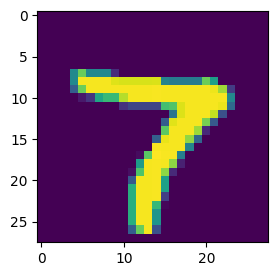

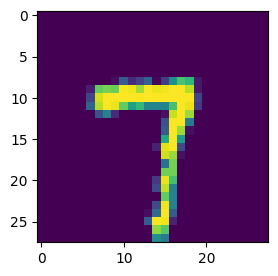

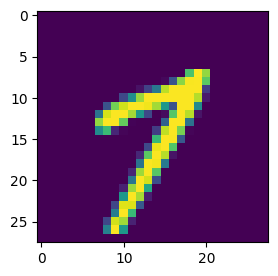

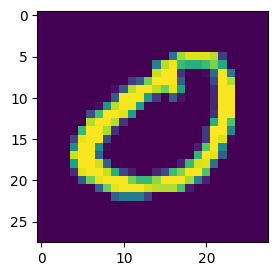

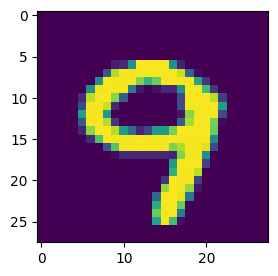

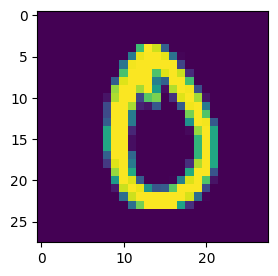

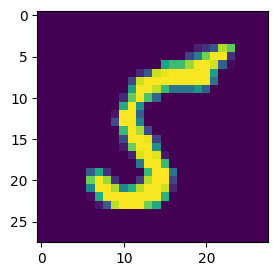

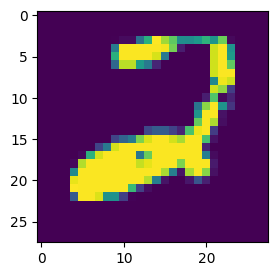

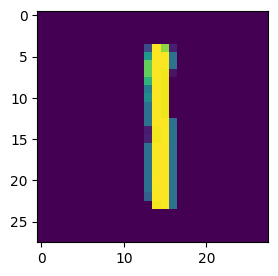

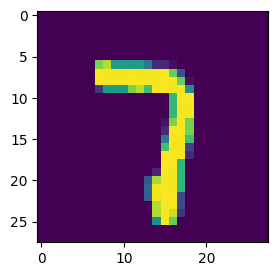

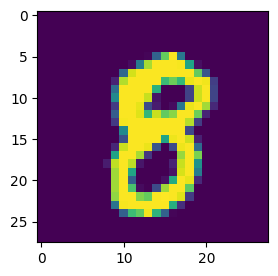

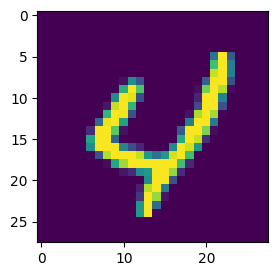

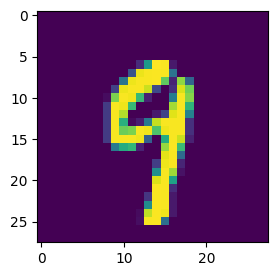

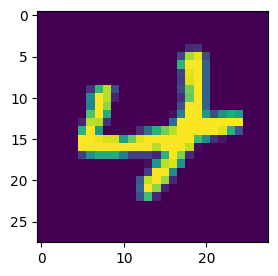

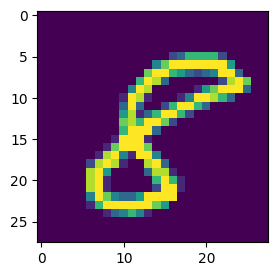

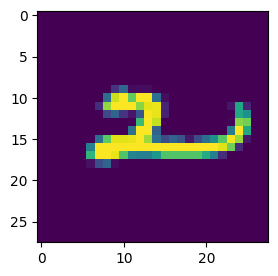

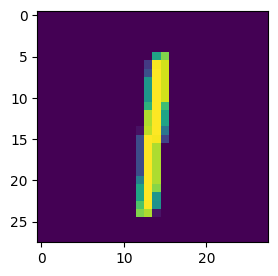

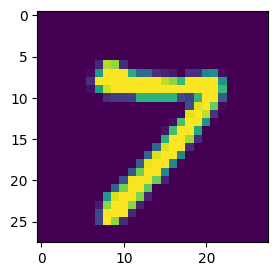

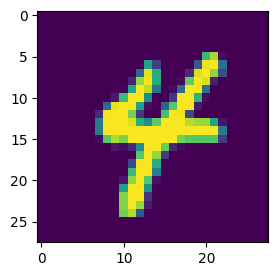

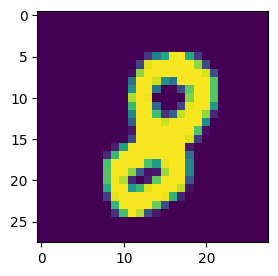

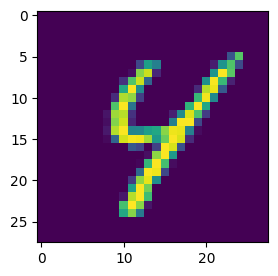

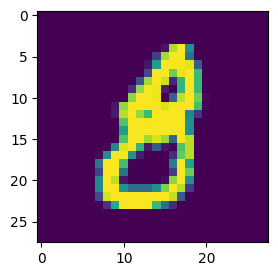

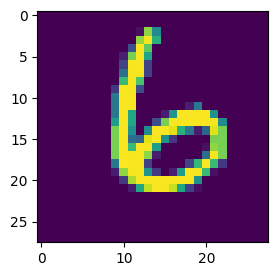

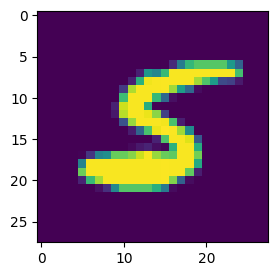

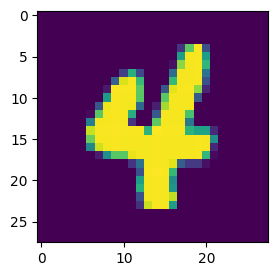

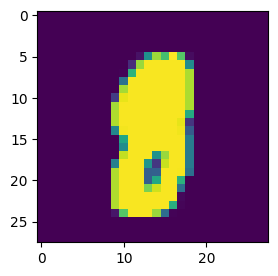

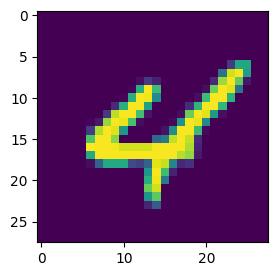

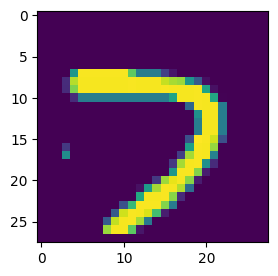

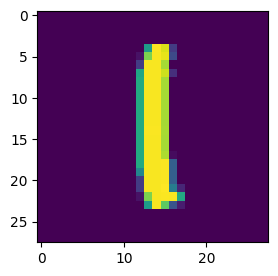

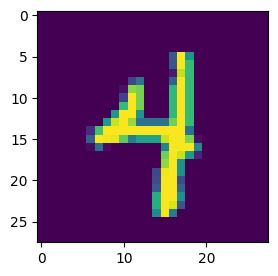

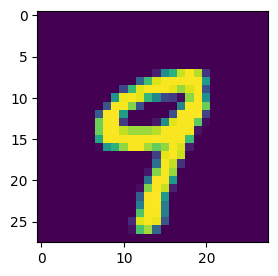

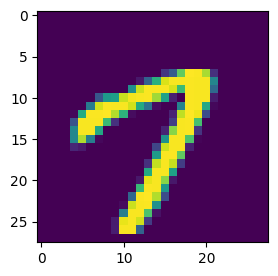

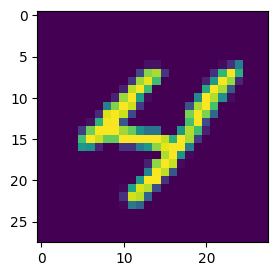

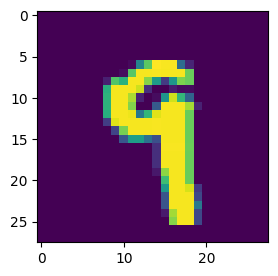

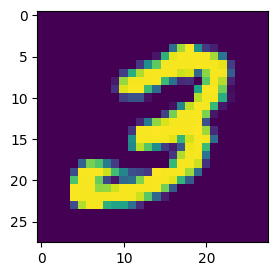

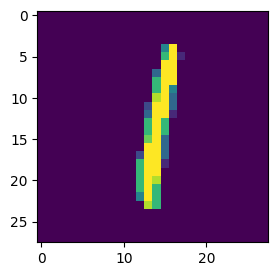

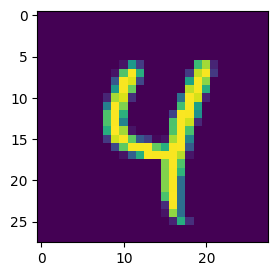

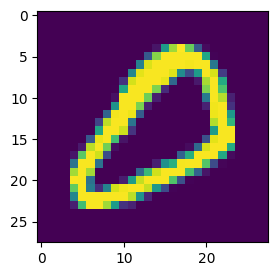

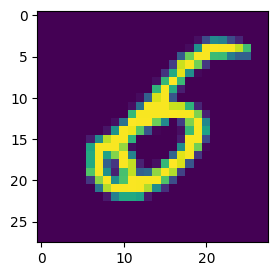

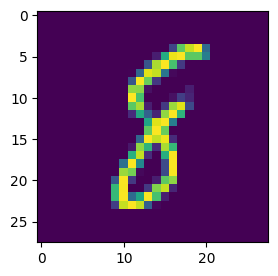

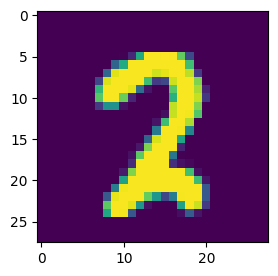

In [33]:
dataiter = iter(test_loader)
for images, labels in dataiter:
    img = images[1]
    fig = plt.figure(figsize=(3, 3))
    plt.imshow(img.reshape((28, 28)))
    print(classes[labels[1].item()])

Forward pass the image through saved conv layers

In [34]:
results = [conv_layers[0](img.to(device))]
for i in range(1, len(conv_layers)):
    # pass the result from the last layer to the next layer
    results.append(conv_layers[i](results[-1]))
# make a copy of the `results`
outputs = results

Visualize features from each layer

Layer output size: torch.Size([32, 28, 28])
Layer 0 feature maps...


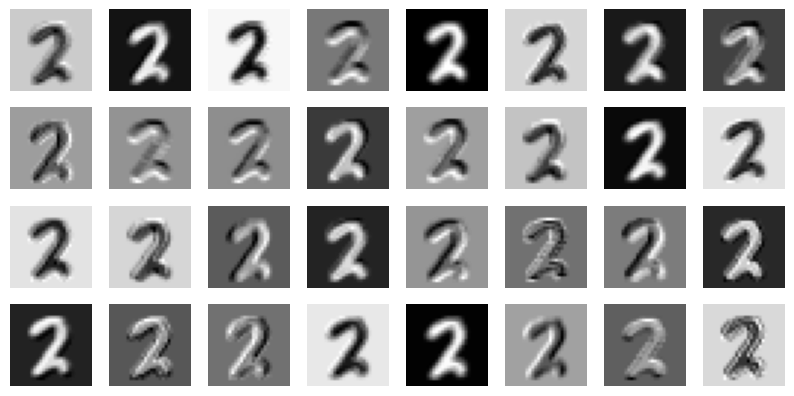

Layer output size: torch.Size([64, 28, 28])
Layer 1 feature maps...


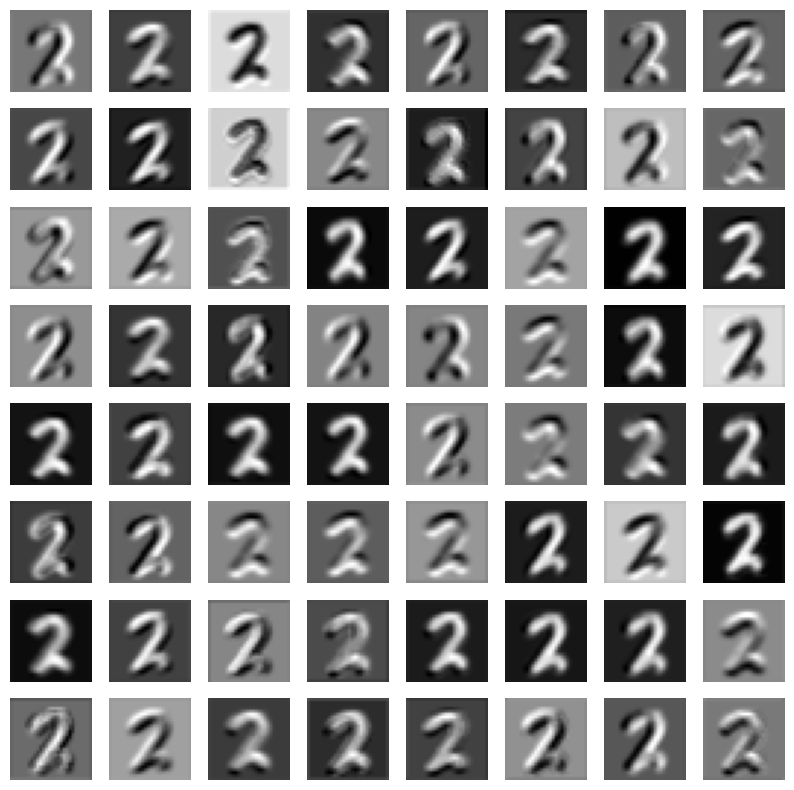

In [35]:
for num_layer in range(len(outputs)):
    plt.figure(figsize=(10, 10))
    layer_viz = outputs[num_layer][:, :, :]
    layer_viz = layer_viz.data
    print('Layer output size:', layer_viz.size())
    for i, filter in enumerate(layer_viz):
        plt.subplot(8, 8, i + 1)
        plt.imshow(filter.cpu().numpy(), cmap='gray')
        plt.axis("off")
    print(f"Layer {num_layer} feature maps...")
    plt.show()
    plt.close()

### Exercises

Q: List a few practical applications of convolutional autoencoders.

Convolutional autoencoders, which combine convolutional neural network (CNN) architecture with autoencoder principles, find applications in various domains due to their ability to learn hierarchical representations of data. Here are a few practical applications of convolutional autoencoders:

Image Denoising:

Convolutional autoencoders can be used for image denoising by learning to reconstruct clean images from noisy ones. The network learns to capture essential features while removing noise during the encoding-decoding process.

Anomaly Detection:

Convolutional autoencoders can learn to encode normal patterns in data and are sensitive to anomalies. They can be applied for detecting anomalous patterns in images, such as identifying defects in manufacturing or anomalies in medical images.

Image Compression:

Convolutional autoencoders can be used for image compression by learning efficient representations of images in the encoding phase. This can be beneficial in applications where bandwidth or storage constraints are critical.

Feature Learning for Classification:

Pre-training convolutional autoencoders on a large dataset allows the model to learn meaningful features. The pre-trained encoder can then be used for transfer learning in classification tasks, improving performance with limited labeled data.

Semantic Segmentation:

Convolutional autoencoders can be adapted for semantic segmentation tasks. By training the network to reconstruct segmented masks of input images, it learns to capture spatial relationships and can be used for pixel-wise image segmentation.

Super-Resolution:

Convolutional autoencoders can be employed for image super-resolution by learning to generate high-resolution images from low-resolution counterparts. This is useful in applications where enhancing image quality is crucial.

Generative Modeling:

Convolutional autoencoders can be used as generative models to generate new samples that resemble the training data. Variational Autoencoders (VAEs) combine convolutional autoencoders with probabilistic latent spaces, allowing for controlled generation of diverse samples.

Medical Image Analysis:

In medical imaging, convolutional autoencoders can aid in tasks such as denoising medical images, anomaly detection in scans, or generating synthetic images for data augmentation in training deep learning models.

Content-Based Image Retrieval:

By learning a compact representation of images, convolutional autoencoders can be used in content-based image retrieval systems, where similar images can be retrieved based on their learned features.

Satellite Image Analysis:

Convolutional autoencoders can assist in satellite image analysis tasks, including segmentation, feature extraction, and anomaly detection, providing valuable insights in fields such as agriculture, urban planning, and environmental monitoring.

finally,These applications showcase the versatility of convolutional autoencoders in handling complex data structures, especially images, and extracting meaningful representations for various downstream tasks.

Q: What change do we need to make for the autoencoder to reduce into PCA?

1. Linear Activation in the Encoder and Decoder:

Replace non-linear activation functions like ReLU or Sigmoid with linear activation functions in both the encoder and decoder layers. Linear activation ensures that the model can only learn linear transformations, similar to the principal components learned by PCA.

2. Mean Squared Error (MSE) Loss Function:

Use Mean Squared Error as the loss function during training. This is a regression loss that encourages the autoencoder to minimize the difference between the input and the reconstructed output.

3. Reduced Dimensionality in the Encoder:

Set the dimensionality of the encoder layer to be the same as the desired number of principal components. This will force the autoencoder to learn a representation with reduced dimensions.

4. Orthogonal Constraint (Optional):

To make the learned components more orthogonal, you can add an orthogonality constraint to the weight matrix of the encoder or decoder layers.

## References and Additional Resources:

*   [Training a classifier tutorial - Pytorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#training-an-image-classifier)
*   [Visualizing Filters and Feature Maps in Convolutional Neural Networks using PyTorch](https://debuggercafe.com/visualizing-filters-and-feature-maps-in-convolutional-neural-networks-using-pytorch/)
*   [ConvNetJS CIFAR10 Demo](https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html)


